# Importing Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")

# Data Preprocessing

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
df.shape

(4746, 12)

In [6]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
print("mean house rent:",round(df["Rent"].mean()))
print("median house rent:",round(df["Rent"].median()))
print("highest house rent:",round(df["Rent"].max()))
print("lowest ouse rent:",round(df["Rent"].min()))

mean house rent: 34993
median house rent: 16000
highest house rent: 3500000
lowest ouse rent: 1200


# Data visualization EDA

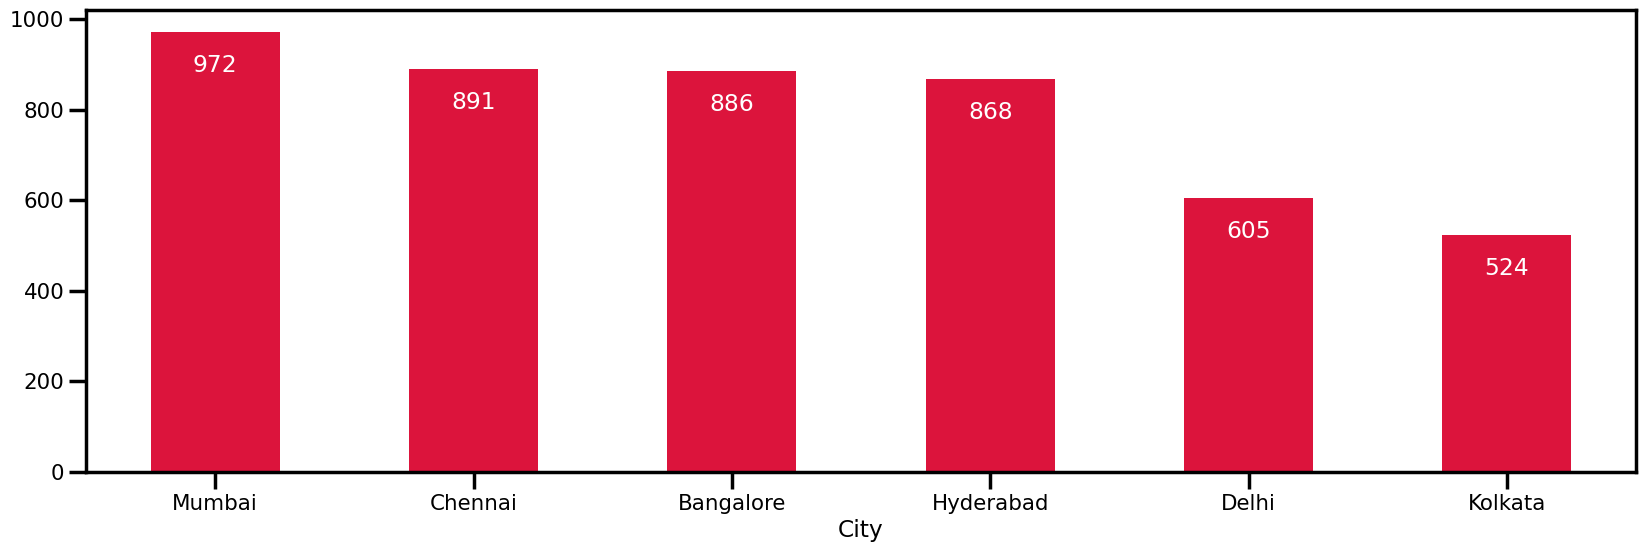

In [11]:
sns.set_context("poster",font_scale= .7)
plt.figure(figsize=(20, 6))
ax= df["City"].value_counts().plot(kind="bar",color="crimson",rot=0)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-100),
                ha="center",va="bottom",color="white")

In [ ]:
#deep copy , shallow copy
data_shallow = df

# Outlier detection

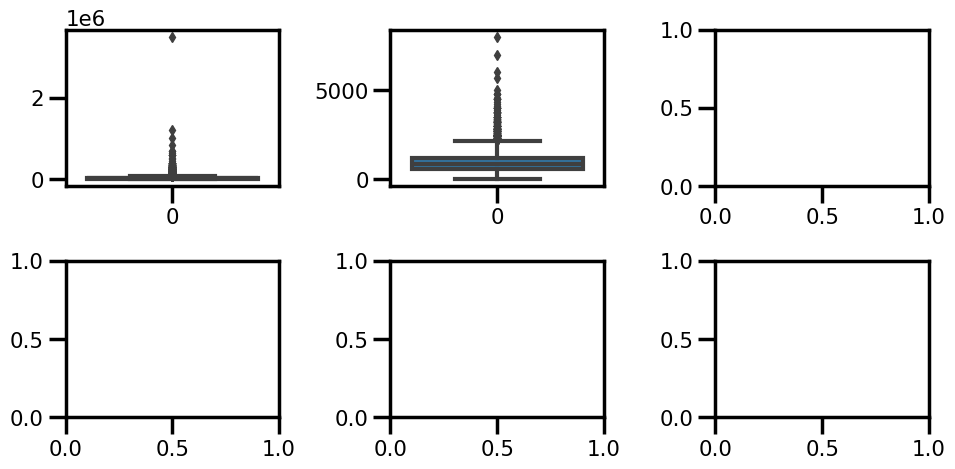

In [13]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(data_shallow['Rent'],ax=axs[0,0])
plt2 = sns.boxplot(data_shallow['Size'],ax=axs[0,1])
plt.tight_layout()

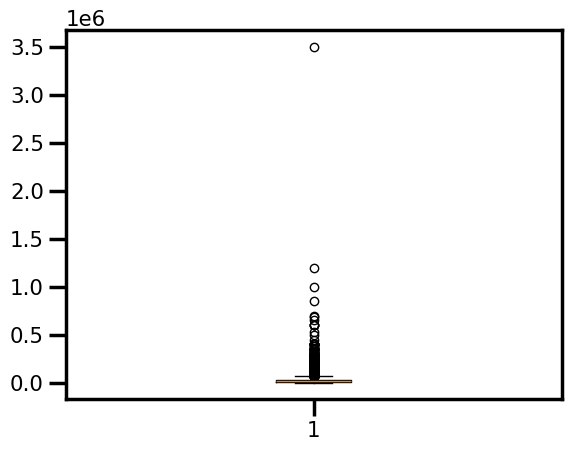

In [14]:
plt.boxplot(df.Rent)
Q1= df.Rent.quantile(0.25)
Q3= df.Rent.quantile(0.75)
IQR=Q3-Q1
housing = df[(df.Rent >= Q1 - 1.5*IQR)&(df.Rent <= Q3 + 1.5* IQR)]

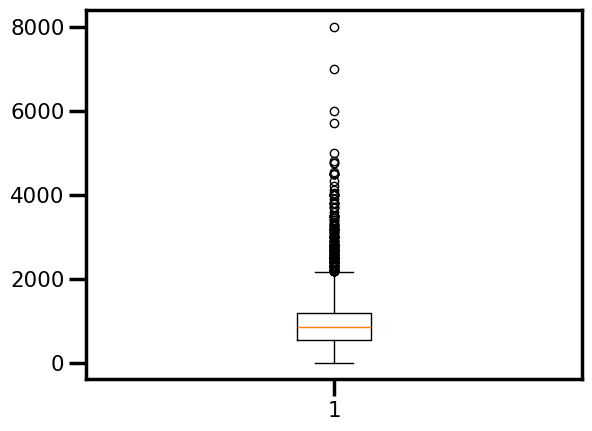

In [15]:
plt.boxplot(df.Size)
Q1= df.Size.quantile(0.25)
Q3= df.Size.quantile(0.75)
IQR = Q3-Q1
housing = df[(df.Size >= Q1 - 1.5*IQR)&(df.Size <= Q3 + 1.5* IQR)]

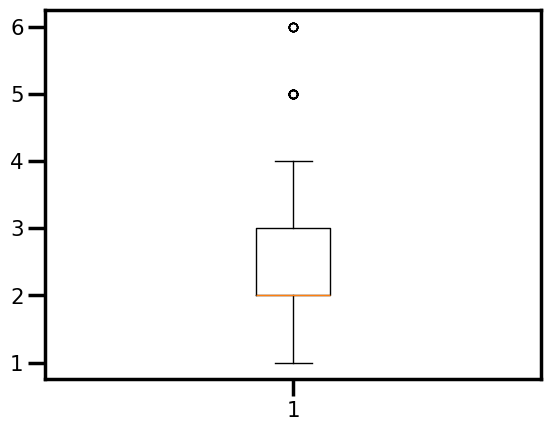

In [16]:
plt.boxplot(df.BHK)
Q1= df.BHK.quantile(0.25)
Q3= df.BHK.quantile(0.75)
IQR = Q3-Q1
housing = df[(df.BHK >= Q1 - 1.5*IQR)&(df.BHK<= Q3 + 1.5* IQR)]

In [ ]:
''1.convert the data object into numerical values for model buliding
2. label encoder --> convert the data
3. split the dataset into x
4. feature importances'''

# Model building

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [5]:
pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/81.9 kB 162.5 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/81.9 kB 465.5 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 572.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import category_encoders as ce

In [20]:
#removing the unwanted columns
df=df.drop(columns="Posted On")

In [22]:
#split the dataset
X=df.drop(columns="Rent")
y=df["Rent"]

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Size               4746 non-null   int64 
 2   Floor              4746 non-null   object
 3   Area Type          4746 non-null   object
 4   Area Locality      4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
dtypes: int64(3), object(7)
memory usage: 370.9+ KB


In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4746 entries, 0 to 4745
Series name: Rent
Non-Null Count  Dtype
--------------  -----
4746 non-null   int64
dtypes: int64(1)
memory usage: 37.2 KB


In [25]:
encoder = ce.LeaveOneOutEncoder()
x=encoder.fit_transform(X,y)

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Size               4746 non-null   int64  
 2   Floor              4746 non-null   float64
 3   Area Type          4746 non-null   float64
 4   Area Locality      4746 non-null   float64
 5   City               4746 non-null   float64
 6   Furnishing Status  4746 non-null   float64
 7   Tenant Preferred   4746 non-null   float64
 8   Bathroom           4746 non-null   int64  
 9   Point of Contact   4746 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 370.9 KB


In [21]:
X

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Traning the model

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [28]:
model_rfr = RandomForestRegressor(n_estimators=7)
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()

In [29]:
models=[model_rfr,model_dt,model_lr]

In [30]:
for model in models:
    print(f"fitting model: {model}")
    model.fit(x_train,y_train)

fitting model: RandomForestRegressor(n_estimators=7)
fitting model: DecisionTreeRegressor()
fitting model: LinearRegression()


In [31]:
for model in models:
    print(f"score of {model} for training data: {model.score(x_train,y_train)}")

score of RandomForestRegressor(n_estimators=7) for training data: 0.7936280981108486
score of DecisionTreeRegressor() for training data: 1.0
score of LinearRegression() for training data: 0.3134521290617006


In [32]:
for model in models:
    print(f"score of {model} for testing data: {model.score(x_test,y_test)}")

score of RandomForestRegressor(n_estimators=7) for testing data: 0.5392506288214887
score of DecisionTreeRegressor() for testing data: -2.946666793117239
score of LinearRegression() for testing data: 0.48598493310400936


In [33]:
for model in models[:]:
    y_predicted = model.predict(x_test)
    print(f"Report:{model}")

Report:RandomForestRegressor(n_estimators=7)
Report:DecisionTreeRegressor()
Report:LinearRegression()


# Feature selection

In [35]:
fs = model_rfr.feature_importances_
feature_names = x.columns

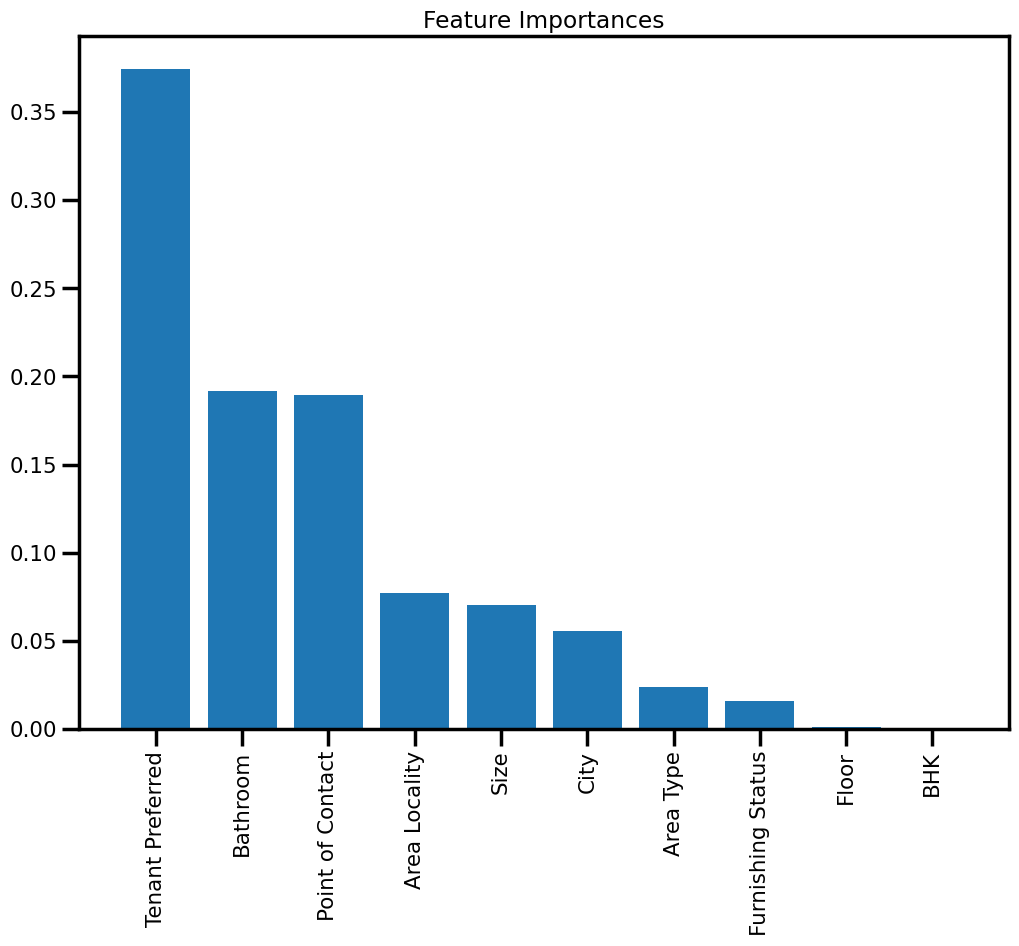

In [36]:
feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)
plt.show()

In [37]:
feature_importances

,0
Tenant Preferred,0.374362
Bathroom,0.191936
Point of Contact,0.189340
Area Locality,0.077135
Size,0.070320
City,0.055549
Area Type,0.023873
Furnishing Status,0.015747
Floor,0.001040
BHK,0.000697


In [46]:

def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = None
    
    # Handling negative values
    if (y_true >= 0).all() and (y_pred >= 0).all():
        mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)

    r2 = metrics.r2_score(y_true, y_pred)

    results = {
        'r2': round(r2, 4),
        'MAE': round(mean_absolute_error, 4),
        'MSE': round(mse, 4),
        'RMSE': round(np.sqrt(mse), 4),
        'mean_squared_log_error': round(mean_squared_log_error, 4) if mean_squared_log_error is not None else "N/A"
    }
    
    return results

for model in models:
    y_predicted = model.predict(x_test)

    print(f"Report: {model}")
    results = regression_results(y_test, y_predicted)
    for metric, value in results.items():
        print(f'{metric}: {value}')
    print("\n")


Report: RandomForestRegressor(n_estimators=7)
r2: 0.5393
MAE: 2564.2699
MSE: 1521944668.2245
RMSE: 39012.1093
mean_squared_log_error: 0.0231


Report: DecisionTreeRegressor()
r2: -2.9467
MAE: 4854.9453
MSE: 13036607011.92
RMSE: 114177.962
mean_squared_log_error: 0.0247


Report: LinearRegression()
r2: 0.486
MAE: 20660.787
MSE: 1697891607.423
RMSE: 41205.4803
mean_squared_log_error: N/A


